In [1]:
import pandas as pd

In [16]:
# open nouseless.csv

df = pd.read_csv('nouseless.csv')

In [18]:
top_10 = df["ITEMID"].value_counts().index

rows = []

# Function to save a backup of the current DataFrame
def save_backup(bdf, index):
    bdf.to_csv(f"backup_{index}.csv", index=True)

i = 0

for idx, hadm_id in enumerate(df["HADM_ID"].unique(), 1):
    grouped_df = df[df["HADM_ID"] == hadm_id]

    grouped_df_pandas = grouped_df

    # Calculate ICU stay time
    icu_stay_time = (grouped_df_pandas["CHARTTIME"].max() - grouped_df_pandas["CHARTTIME"].min()).total_seconds() / 60

    # Create a dictionary to store the row data
    row = {"HADM_ID": hadm_id, "ICU_stay_time": icu_stay_time}

    # Get the value counts for ITEMID in the current group
    item_counts = grouped_df_pandas["ITEMID"].value_counts()

    # Add the counts for the top 10 ITEMIDs to the row dictionary
    for item in top_10:
        row[f"ITEMID_{item}"] = item_counts.get(item, float('nan'))

    # Append the row to the list of rows
    rows.append(row)

    # Save a backup every 100 HADM_IDs
    if idx % 10000 == 0:
        result_df = pd.DataFrame(rows)
        save_backup(result_df, idx)
        print(i)
    i += 1

# Create the final DataFrame from the collected rows
result_df = pd.DataFrame(rows)

# Display the resulting DataFrame
print(result_df)


9999
19999
29999
39999
49999
        HADM_ID  ICU_stay_time  ITEMID_211.0  ITEMID_742.0  ITEMID_646.0  \
0      180021.0        37540.0         268.0         261.0         263.0   
1      178017.0         5325.0          50.0          48.0          51.0   
2      182760.0         8570.0          65.0          67.0          64.0   
3      168287.0        31440.0         263.0         261.0         254.0   
4      160495.0        37290.0         313.0         305.0         313.0   
...         ...            ...           ...           ...           ...   
55310  170358.0            0.0           1.0           NaN           NaN   
55311  109314.0            0.0           1.0           NaN           NaN   
55312  175702.0            0.0           1.0           NaN           NaN   
55313  186428.0            0.0           1.0           NaN           NaN   
55314       1.0            NaN           NaN           NaN           NaN   

       ITEMID_618.0  ITEMID_212.0  ITEMID_161.0  ITEMID_12

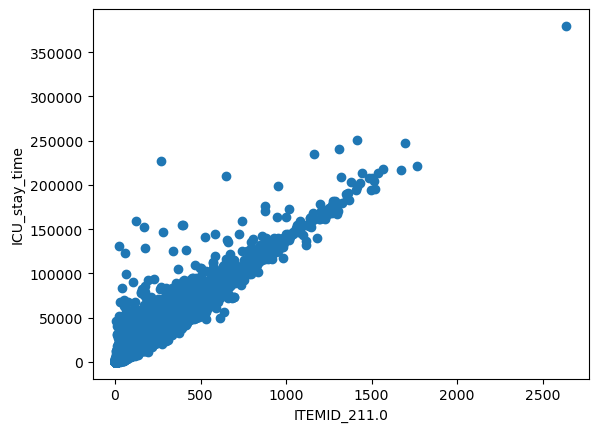

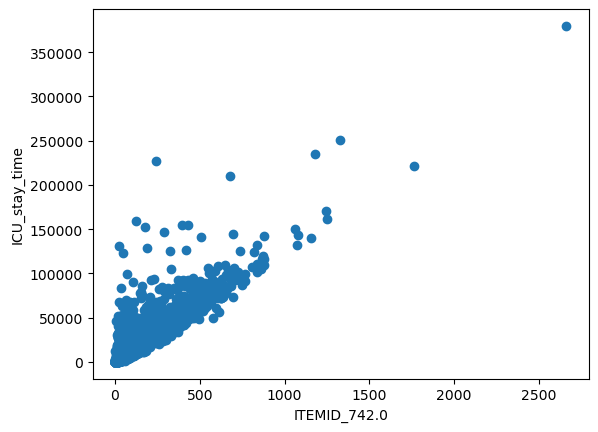

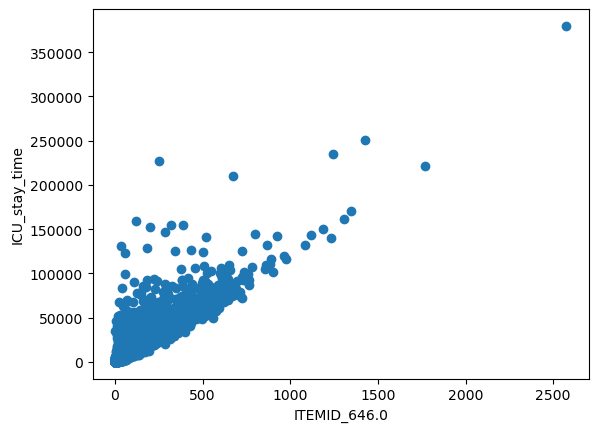

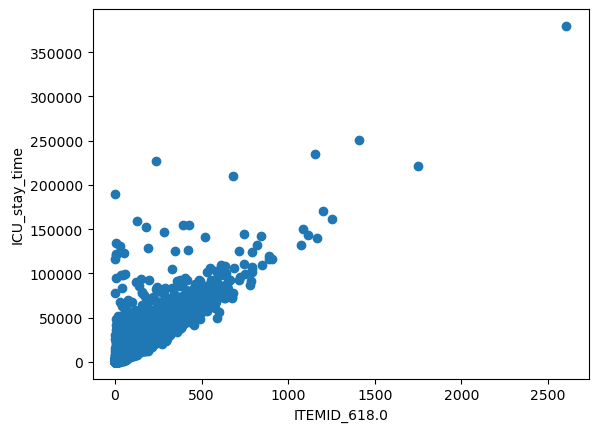

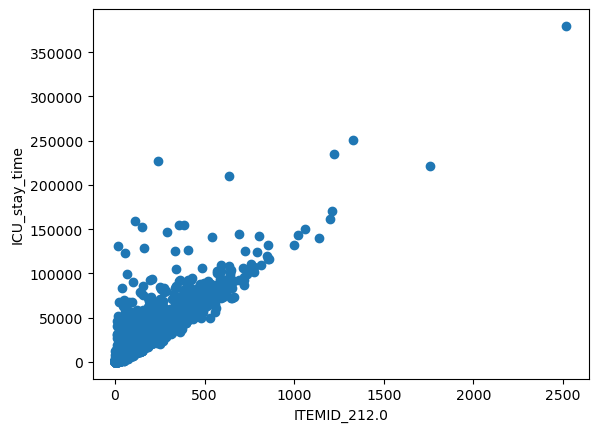

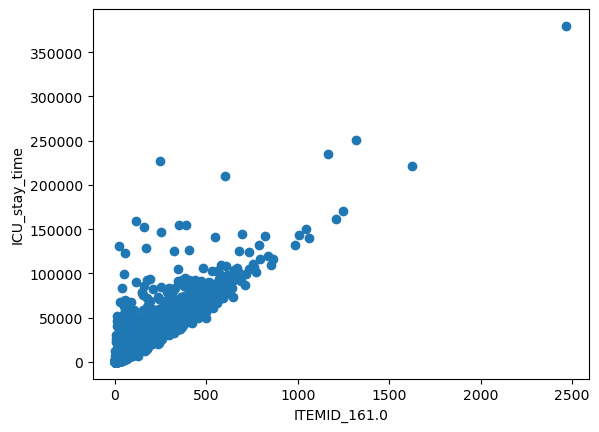

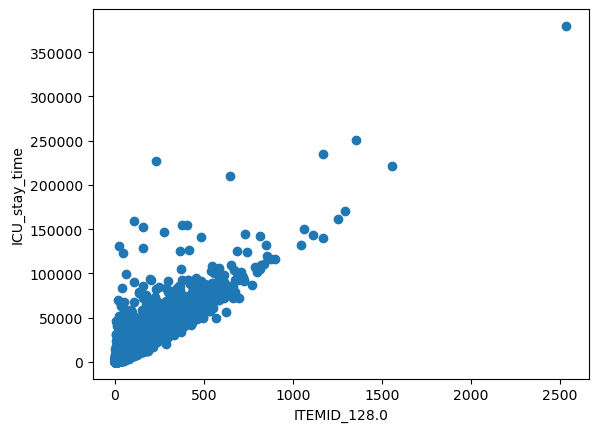

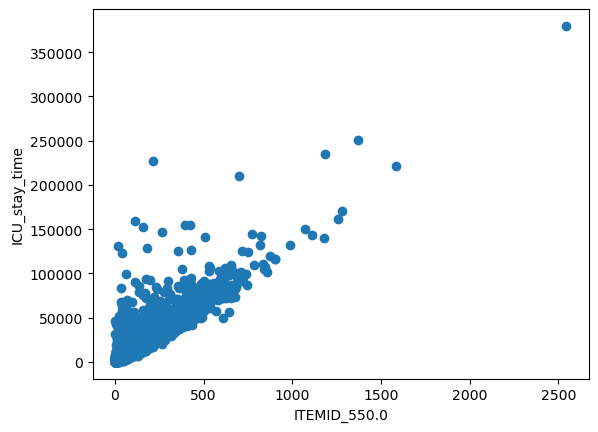

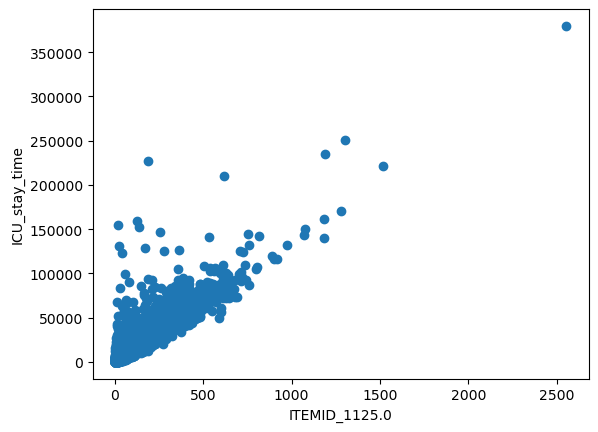

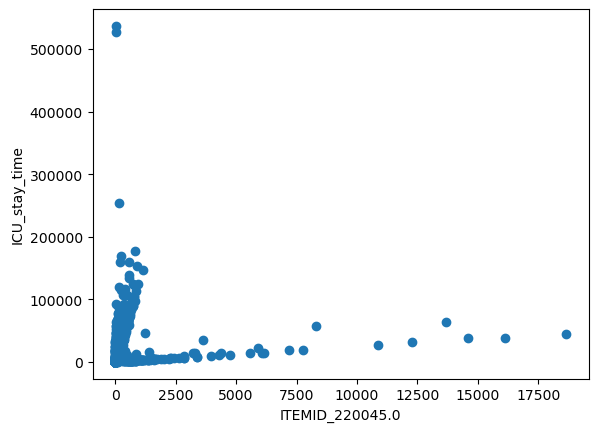

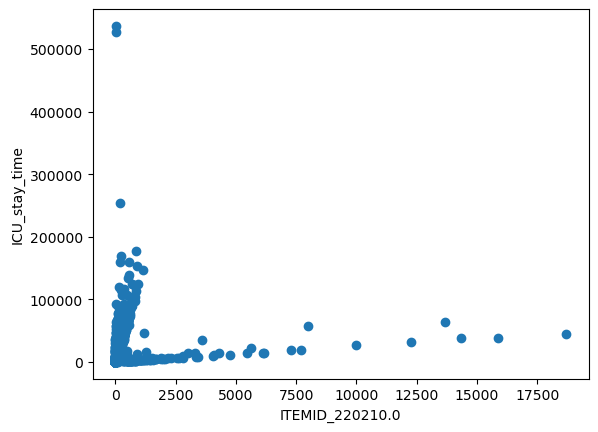

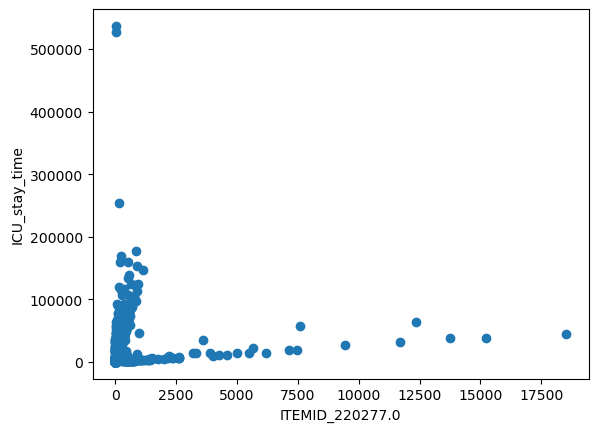

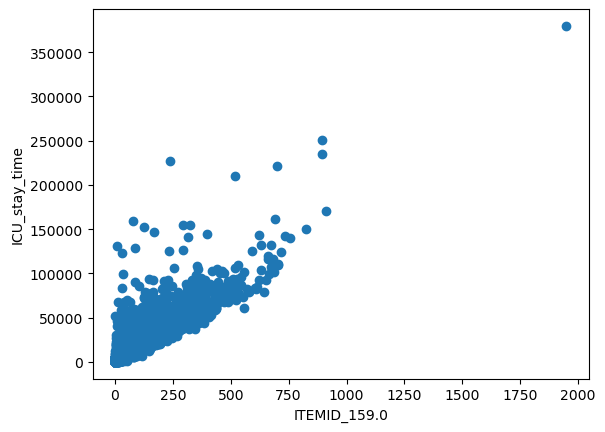

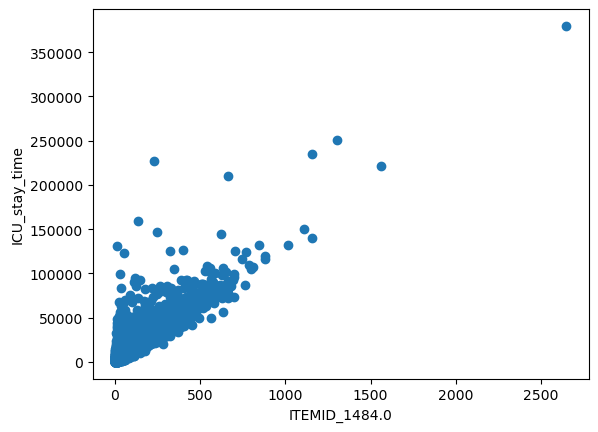

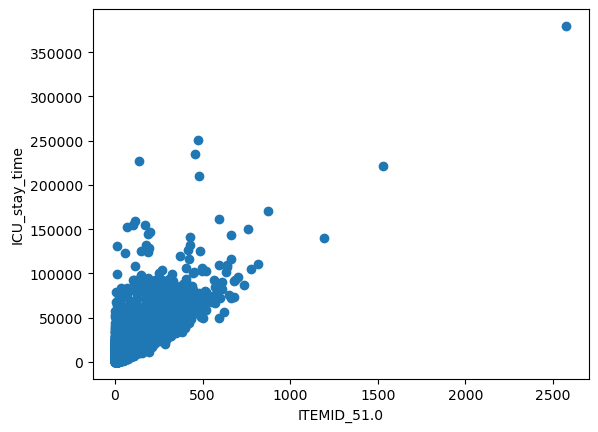

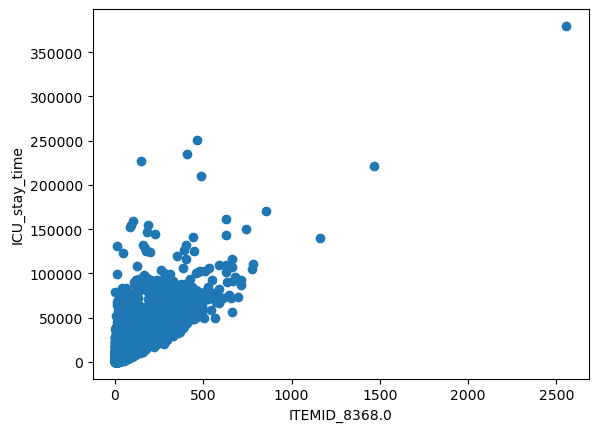

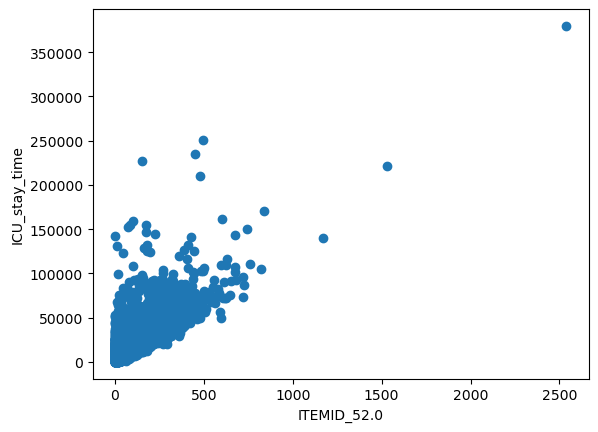

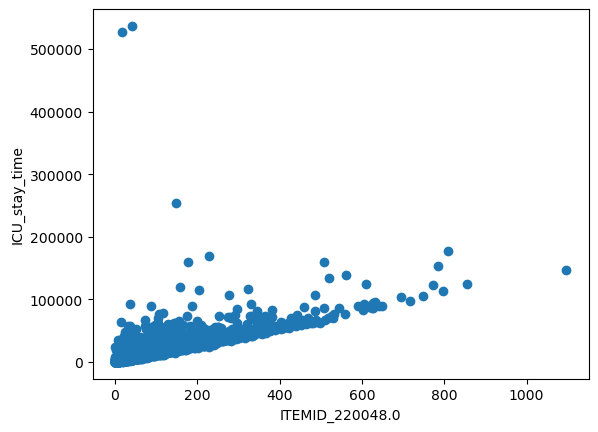

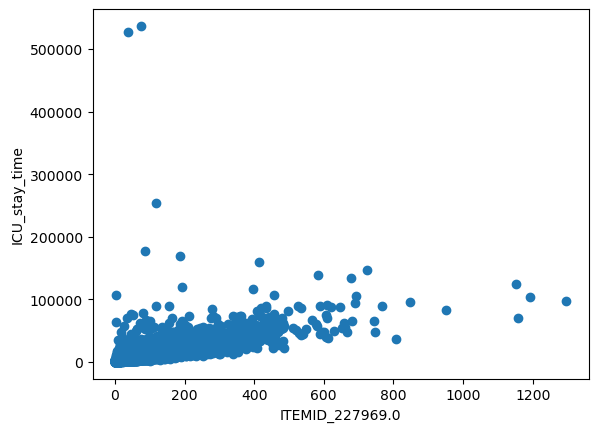

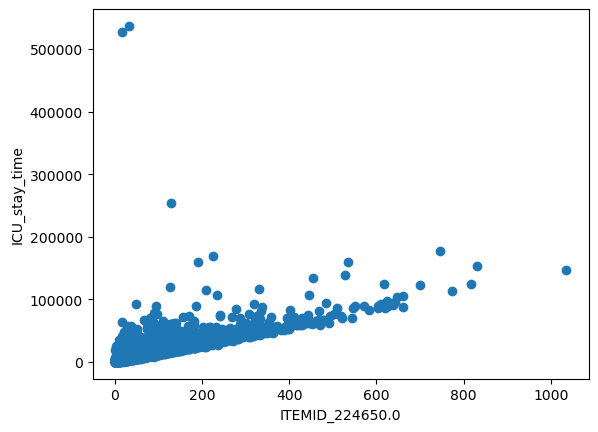

In [21]:
import matplotlib.pyplot as plt
import numpy as np



#save result_df to csv
result_df.to_csv('result_df.csv')

for column in result_df.columns[2:]:
    plt.scatter(result_df[column], result_df['ICU_stay_time'])
    plt.xlabel(column)
    plt.ylabel('ICU_stay_time')
    plt.show()

In [23]:
# remove entries with more than 6 NaNs, fill the rest with 0

result_df = result_df.dropna(thresh=6)

result_df = result_df.fillna(0)

# remove outliers by removing entries with ICU_stay_time > 100000
result_df = result_df[result_df['ICU_stay_time'] < 100000]

11050193.879128177


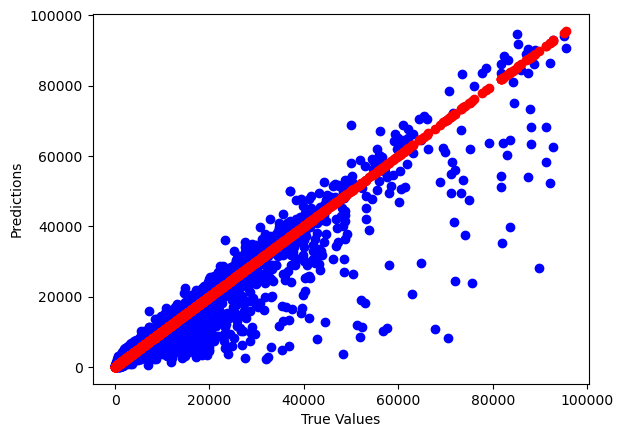

In [26]:

# make a neural network regression model to predict icu stay time based on the top 10 ITEMIDs 

from sklearn.model_selection import train_test_split

X = result_df[result_df.columns[2:]]
y = result_df['ICU_stay_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))